In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Activation, Dense, Flatten, BatchNormalization, MaxPool2D
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.applications import imagenet_utils
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os
import shutil
import random
import glob

In [5]:
from tensorflow.python.keras.applications.mobilenet import MobileNet
mobile = MobileNet()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [20]:
from tensorflow.python.keras.applications.mobilenet import preprocess_input
def prepare_image(file, img_path):
    img= image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

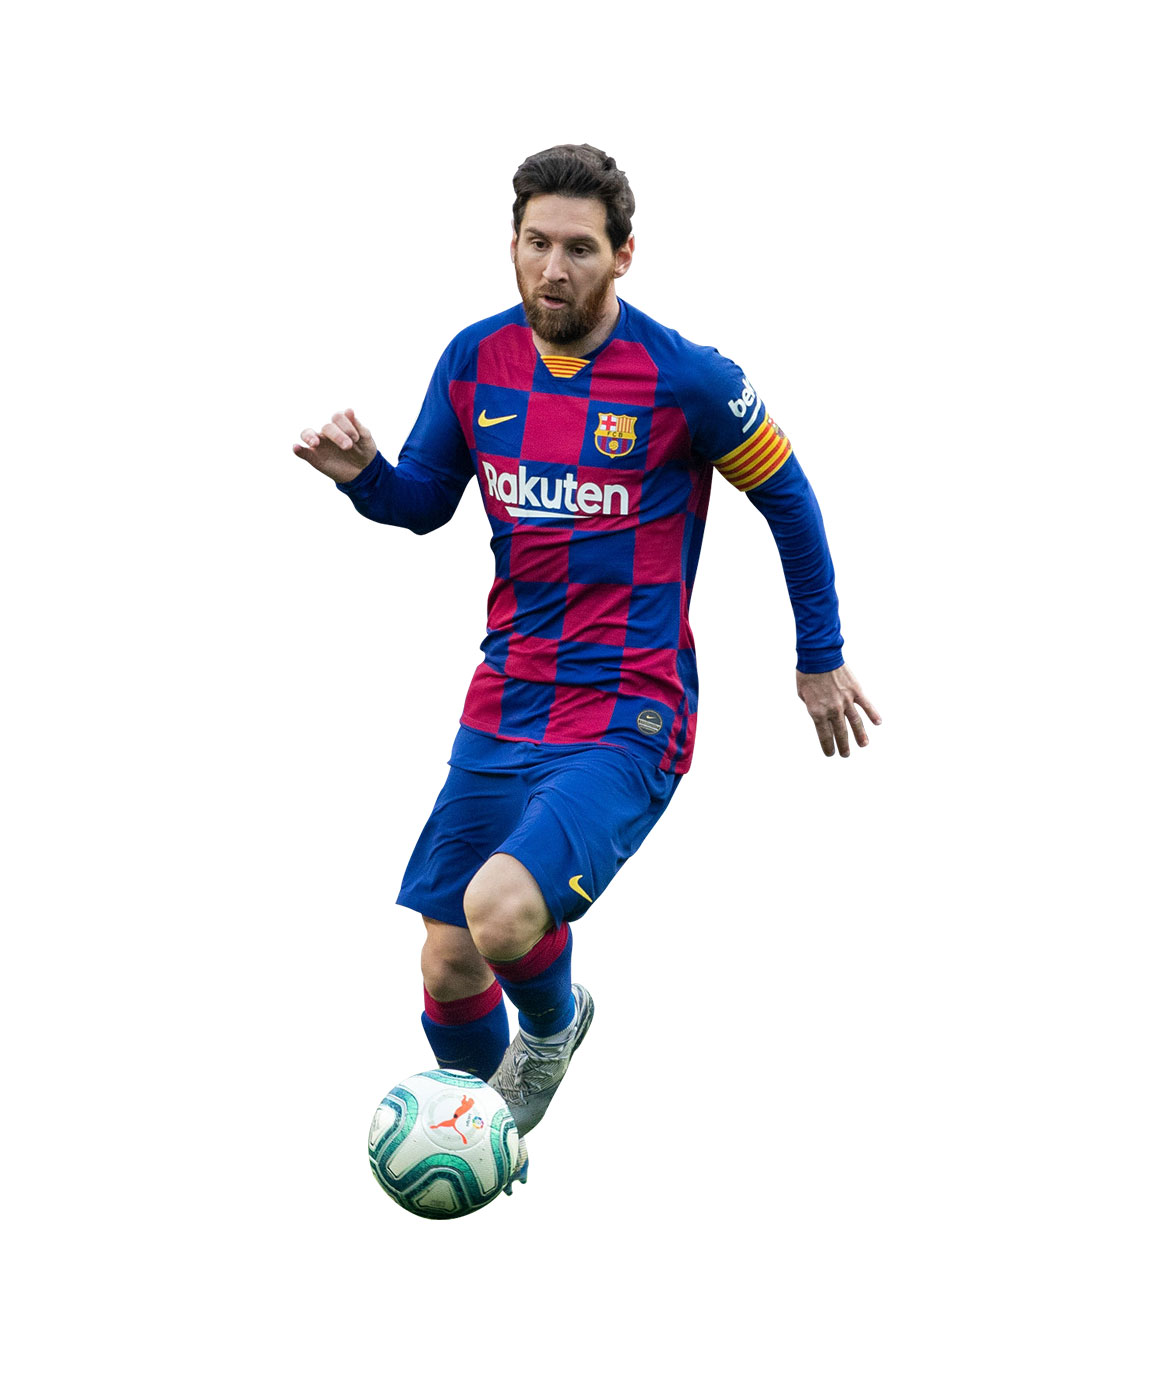

In [21]:
from IPython.display import Image
Image(filename='C:/Users/aboubakiri.diaw/deploiement recomm/keras/models/sample_mobilenet/1.jpg', width=3300, height=200)

In [23]:
preprocessed_image = prepare_image('1.jpg', 'C:/Users/aboubakiri.diaw/deploiement recomm/keras/models/sample_mobilenet/')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04254680', 'soccer_ball', 0.422721),
  ('n02777292', 'balance_beam', 0.13841736),
  ('n03623198', 'knee_pad', 0.1068269),
  ('n04509417', 'unicycle', 0.1009321),
  ('n04118538', 'rugby_ball', 0.02951044)]]

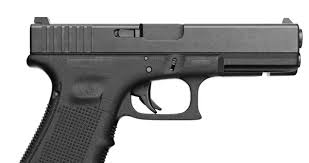

In [24]:
Image(filename='C:/Users/aboubakiri.diaw/deploiement recomm/keras/models/sample_mobilenet/3.JPEG', width=3300, height=200)

In [25]:
preprocessed_image = prepare_image('3.JPEG', 'C:/Users/aboubakiri.diaw/deploiement recomm/keras/models/sample_mobilenet/')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02749479', 'assault_rifle', 0.66149294),
  ('n04086273', 'revolver', 0.32945812),
  ('n03527444', 'holster', 0.004594827),
  ('n04090263', 'rifle', 0.0041664643),
  ('n03532672', 'hook', 5.1016905e-05)]]